# Load Packages

In [1]:
import pandas as pd # for loading data
import geopandas as gpd # for working on geodata
import matplotlib.pyplot as plt # for plotting

# helpers
# import contextily as ctx # for adding maps
from shapely.geometry import Point

`descartes` must also be installed!

# Load Data

## Shapefile

In [2]:
shapefile = gpd.read_file('../raw_data/shapefiles/louisville.shp')

In [3]:
shapefile.rename(columns = {'marketCTs_': 'NH'}, inplace = True)

In [4]:
shapefile.head()

,NH,Id,geometry
0,Airport,13,"POLYGON ((-85.72897 38.19008, -85.72813 38.189..."
1,Central Bardstown,15,"POLYGON ((-85.64922 38.22133, -85.64625 38.221..."
2,Central Preston,14,"POLYGON ((-85.68237 38.16812, -85.68174 38.167..."
3,Central Taylorsville,16,"POLYGON ((-85.60988 38.23319, -85.60437 38.231..."
4,Downtown,1,"POLYGON ((-85.74865 38.26737, -85.74829 38.267..."


In [5]:
shapefile.geometry.name

'geometry'

This needs `descartes`

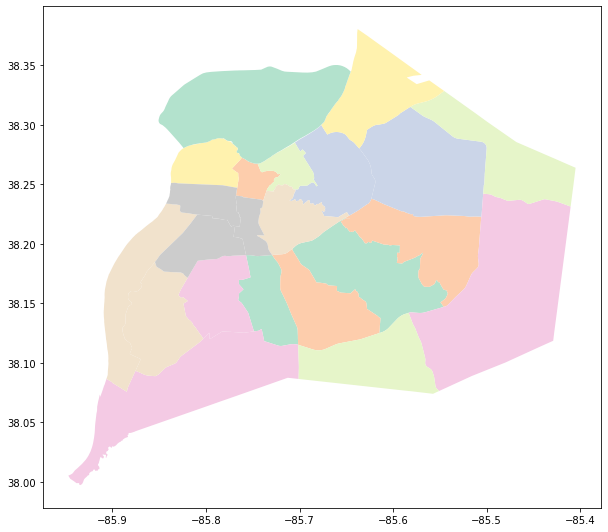

In [6]:
# define figure and ax(es):

fig, ax1 = plt.subplots(1,1, figsize = (10, 10))

shapefile.plot(column = 'NH',
         cmap = 'Pastel2',
         ax = ax1)

plt.show()

In [7]:
# check if crs is EPSG:4326
shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Load DataFrame

In [8]:
trips = pd.read_csv('../data/escooters-merged.csv')

In [9]:
trips.rename(columns = {'Start': 'StartTime', 'End': 'EndTime'}, inplace = True)

In [10]:
trips.head()

,TripID,Duration,Distance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,StartTime,EndTime
0,0000045c-2677-3a7d-4b73-cad99a57,3.0,0.000,38.253,-85.756,38.253,-85.755,2019-06-26 19:30:00,2019-06-26 19:30:00
1,0000487b-92e6-50d6-7569-42ed3818,5.0,0.000,38.203,-85.752,38.204,-85.751,2019-09-22 14:30:00,2019-09-22 14:30:00
2,00006088-2579-e0d0-6a30-a15bb878,6.0,0.330,38.259,-85.733,38.265,-85.739,2019-08-21 17:30:00,2019-08-21 17:30:00
3,00008c1a-899b-8596-970f-9f6bf495,6.0,0.640,38.217,-85.757,38.221,-85.763,2019-07-03 11:00:00,2019-07-03 11:15:00
4,00009301-3225-2aea-a84a-165a480a,7.0,0.599,38.215,-85.759,38.222,-85.764,2019-11-22 10:45:00,2019-11-22 11:00:00


# Split `Trips` in Three

In this way we create three datasets with a common key, `TripID`, and we will merge them at the end.

## Trip Duration and Distance

In [12]:
trips_dd = trips[['TripID', 'Duration', 'Distance']]

In [13]:
trips_dd.head()

,TripID,Duration,Distance
0,0000045c-2677-3a7d-4b73-cad99a57,3.0,0.000
1,0000487b-92e6-50d6-7569-42ed3818,5.0,0.000
2,00006088-2579-e0d0-6a30-a15bb878,6.0,0.330
3,00008c1a-899b-8596-970f-9f6bf495,6.0,0.640
4,00009301-3225-2aea-a84a-165a480a,7.0,0.599


## Start DataFrame

Select the subsection of the original dataframe we are intersted in:

In [24]:
start_cols = [col for col in trips.columns if ('Start' in col or 'TripID' in col)]

In [26]:
trips_start = trips[start_cols]
trips_start.head()

,TripID,StartLatitude,StartLongitude,StartTime
0,0000045c-2677-3a7d-4b73-cad99a57,38.253,-85.756,2019-06-26 19:30:00
1,0000487b-92e6-50d6-7569-42ed3818,38.203,-85.752,2019-09-22 14:30:00
2,00006088-2579-e0d0-6a30-a15bb878,38.259,-85.733,2019-08-21 17:30:00
3,00008c1a-899b-8596-970f-9f6bf495,38.217,-85.757,2019-07-03 11:00:00
4,00009301-3225-2aea-a84a-165a480a,38.215,-85.759,2019-11-22 10:45:00


And turn it into a `GeoDataFrame`, specifying its geometry.

In [27]:
gdf_start = gpd.GeoDataFrame(trips_start,
                             geometry=gpd.points_from_xy(trips.StartLongitude, trips.StartLatitude),
                             crs = 'EPSG:4326')
gdf_start.head()

,TripID,StartLatitude,StartLongitude,StartTime,geometry
0,0000045c-2677-3a7d-4b73-cad99a57,38.253,-85.756,2019-06-26 19:30:00,POINT (-85.75600 38.25300)
1,0000487b-92e6-50d6-7569-42ed3818,38.203,-85.752,2019-09-22 14:30:00,POINT (-85.75200 38.20300)
2,00006088-2579-e0d0-6a30-a15bb878,38.259,-85.733,2019-08-21 17:30:00,POINT (-85.73300 38.25900)
3,00008c1a-899b-8596-970f-9f6bf495,38.217,-85.757,2019-07-03 11:00:00,POINT (-85.75700 38.21700)
4,00009301-3225-2aea-a84a-165a480a,38.215,-85.759,2019-11-22 10:45:00,POINT (-85.75900 38.21500)


## End DataFrame

Select the subsection of the original dataframe we are intersted in:

In [28]:
end_cols = [col for col in trips.columns if ('End' in col or 'TripID' in col)]

In [29]:
trips_end = trips[end_cols]
trips_end.head()

,TripID,EndLatitude,EndLongitude,EndTime
0,0000045c-2677-3a7d-4b73-cad99a57,38.253,-85.755,2019-06-26 19:30:00
1,0000487b-92e6-50d6-7569-42ed3818,38.204,-85.751,2019-09-22 14:30:00
2,00006088-2579-e0d0-6a30-a15bb878,38.265,-85.739,2019-08-21 17:30:00
3,00008c1a-899b-8596-970f-9f6bf495,38.221,-85.763,2019-07-03 11:15:00
4,00009301-3225-2aea-a84a-165a480a,38.222,-85.764,2019-11-22 11:00:00


And turn it into a `GeoDataFrame`, specifying its geometry.

In [30]:
gdf_end =gpd.GeoDataFrame(trips_end,
                          geometry = gpd.points_from_xy(trips_end.EndLongitude, trips_end.EndLatitude),
                          crs = 'EPSG:4326')

# Intersect GDF and Shapefile

In [31]:
print(
    'Start CRS is {} its geometry is `{}`.\n'.format(gdf_start.crs, gdf_start.geometry.name) +
    'End CRS is {}, its geometry is `{}`.\n'.format(gdf_end.crs, gdf_end.geometry.name) +
    'Shapefile CRS is {}.'.format(shapefile.crs)
)

Start CRS is EPSG:4326 its geometry is `geometry`.
End CRS is EPSG:4326, its geometry is `geometry`.
Shapefile CRS is epsg:4326.


## Intersect Starting Points

In [32]:
start_nh = gpd.overlay(gdf_start, shapefile, how = 'intersection')

In [33]:
start_nh.rename(columns = {'NH': 'StartNH'}, inplace = True)

In [34]:
start_nh.head()

,TripID,StartLatitude,StartLongitude,StartTime,StartNH,Id,geometry
0,0000045c-2677-3a7d-4b73-cad99a57,38.253,-85.756,2019-06-26 19:30:00,Downtown,1,POINT (-85.75600 38.25300)
1,00006088-2579-e0d0-6a30-a15bb878,38.259,-85.733,2019-08-21 17:30:00,Downtown,1,POINT (-85.73300 38.25900)
2,00011cdb-4801-1ce5-a15d-6b9a539a,38.251,-85.758,2019-06-09 13:30:00,Downtown,1,POINT (-85.75800 38.25100)
3,00017244-16f8-0be0-5a68-3e860236,38.257,-85.759,2018-10-23 17:45:00,Downtown,1,POINT (-85.75900 38.25700)
4,00017be7-7711-fadc-e978-da71582c,38.246,-85.755,2019-06-28 05:00:00,Downtown,1,POINT (-85.75500 38.24600)


## Intersect End Points

In [35]:
end_nh = gpd.overlay(gdf_end, shapefile, how = 'intersection')

In [36]:
end_nh.rename(columns = {'NH': 'EndNH'}, inplace = True)

In [37]:
end_nh.head()

,TripID,EndLatitude,EndLongitude,EndTime,EndNH,Id,geometry
0,0000045c-2677-3a7d-4b73-cad99a57,38.253,-85.755,2019-06-26 19:30:00,Downtown,1,POINT (-85.75500 38.25300)
1,00011cdb-4801-1ce5-a15d-6b9a539a,38.257,-85.760,2019-06-09 13:45:00,Downtown,1,POINT (-85.76000 38.25700)
2,00017244-16f8-0be0-5a68-3e860236,38.254,-85.758,2018-10-23 17:45:00,Downtown,1,POINT (-85.75800 38.25400)
3,00017be7-7711-fadc-e978-da71582c,38.246,-85.756,2019-06-28 05:15:00,Downtown,1,POINT (-85.75600 38.24600)
4,0001c852-f879-9ff0-3ca9-8221ce91,38.250,-85.737,2019-06-14 22:00:00,Downtown,1,POINT (-85.73700 38.25000)


# Merge the two splits to create the final dataset

In [38]:
start_nh.drop(['Id', 'geometry'], inplace = True, axis = 1)

In [39]:
end_nh.drop(['Id', 'geometry'], inplace = True, axis = 1)

In [41]:
gdf = trips_dd.merge(start_nh, on = 'TripID').merge(end_nh)

In [42]:
gdf.head()

,TripID,Duration,Distance,StartLatitude,StartLongitude,StartTime,StartNH
0,0000045c-2677-3a7d-4b73-cad99a57,3.0,0.000,38.253,-85.756,2019-06-26 19:30:00,Downtown
1,0000487b-92e6-50d6-7569-42ed3818,5.0,0.000,38.203,-85.752,2019-09-22 14:30:00,University
2,00006088-2579-e0d0-6a30-a15bb878,6.0,0.330,38.259,-85.733,2019-08-21 17:30:00,Downtown
3,00008c1a-899b-8596-970f-9f6bf495,6.0,0.640,38.217,-85.757,2019-07-03 11:00:00,University
4,00009301-3225-2aea-a84a-165a480a,7.0,0.599,38.215,-85.759,2019-11-22 10:45:00,University


In [50]:
print(start_nh.shape, end_nh.shape, gdf.shape)

(538922, 4) (538832, 4) (538832, 8)


Note: the shapes differ, but that is because some trips start in the boundaries and end outside.

## Save the final dataset

In [51]:
gdf.to_csv('../data/escooters_od.csv')